In [5]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram, array_to_latex
from qiskit.result import marginal_distribution
from qiskit.circuit.library import UGate
from numpy import pi, random

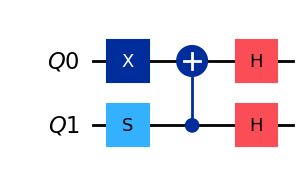

<IPython.core.display.Latex object>

In [ ]:
from qiskit.quantum_info import Operator

q0 = QuantumRegister(1, "Q0")
q1 = QuantumRegister(1, "Q1")

circuit = QuantumCircuit(q0, q1)
circuit.x(q0)
circuit.s(q1)
circuit.cx(q1, q0)
circuit.h(q0)
circuit.h(q1)

display(circuit.draw("mpl"))

op = Operator(circuit)

display(array_to_latex(op))

In [21]:
# -*- coding: utf-8 -*-
import sympy
from IPython.display import display, Markdown

# SymPyの出力をLaTeXできれいに表示する設定 (Jupyter Notebook/Lab用)
sympy.init_printing(use_latex='mathjax')

# --- 1. 基本ゲートの定義 ---
display(Markdown("## 1. 基本ゲートの定義"))

# Pauli-X ゲート
X = sympy.Matrix([[0, 1],
                  [1, 0]])
display(Markdown("### Pauli-X ゲート ($X$)"))
display(X)

# S ゲート (Phase Gate)
S = sympy.Matrix([[1, 0],
                  [0, sympy.I]]) # sympy.I は虚数単位 i
display(Markdown("### S ゲート ($S$)"))
display(S)

# アダマール(Hadamard)ゲート H
H = (1/sympy.sqrt(2)) * sympy.Matrix([[1, 1],
                                      [1, -1]])
display(Markdown("### アダマールゲート ($H$)"))
display(H)

# CNOTゲート (コントロール q1, ターゲット q0)
# Qiskitの基底 |q1 q0> の順序 (|00>, |01>, |10>, |11>) に対応
CNOT_10 = sympy.Matrix([[1, 0, 0, 0],
                        [0, 1, 0, 0],
                        [0, 0, 0, 1],
                        [0, 0, 1, 0]])
display(Markdown("### CNOTゲート (コントロール $q_1$, ターゲット $q_0$)"))
display(CNOT_10)

# --- 2. 回路ステップごとの行列計算 ---
display(Markdown("---"))
display(Markdown("## 2. 回路ステップごとの行列計算"))
display(Markdown("Qiskitの規約 ($|q_1 q_0\\rangle$) に従い、テンソル積は $Gate_{q1} \\otimes Gate_{q0}$ の順で計算します。"))

# ステップ1: X(q0) と S(q1)
# 対応する行列 U1 = S(q1) ⊗ X(q0)
display(Markdown("### ステップ1: $U_1 = S_{q1} \\otimes X_{q0}$"))
U1 = sympy.kronecker_product(S, X)
display(Markdown("計算結果 $U_1$:"))
display(U1)

# ステップ2: CNOT(q1, q0)
# 対応する行列 U2 = CNOT_10
display(Markdown("### ステップ2: $U_2 = CNOT_{1 \\to 0}$"))
U2 = CNOT_10
display(Markdown("（上で定義済み）"))
# display(U2) # 再表示する場合はコメントアウトを外す

# ステップ3: H(q0) と H(q1)
# 対応する行列 U3 = H(q1) ⊗ H(q0)
display(Markdown("### ステップ3: $U_3 = H_{q1} \\otimes H_{q0}$"))
U3 = sympy.kronecker_product(H, H)
display(Markdown("計算結果 $U_3$:"))
display(U3)

# --- 3. 回路全体の演算子行列の計算 ---
display(Markdown("---"))
display(Markdown("## 3. 回路全体の演算子行列"))
display(Markdown("回路全体の演算子 $Op$ は、回路のステップとは逆の順序で行列を掛け合わせます。"))
display(Markdown("$Op = U_3 \\times U_2 \\times U_1 = (H \\otimes H) \\times CNOT_{1 \\to 0} \\times (S \\otimes X)$"))

# 行列の乗算
Op_sympy = U3 * U2 * U1

display(Markdown("最終的な演算子行列 $Op$:"))
display(Op_sympy)

# --- 4. Qiskitの結果と比較 (参考) ---
# display(Markdown("---"))
# display(Markdown("## 4. Qiskitの結果 (参考)"))
# display(Markdown("Qiskitの `Operator(circuit)` で得られる行列:"))
# # Qiskitのコードはここでは実行できないため、
# # 最初の質問にあった array_to_latex(op) の結果を手動で比較してください。
# # 例:
# # qiskit_op_matrix = sympy.Matrix([
# #     [1/sqrt(2), 1/sqrt(2), 0, 0],
# #     [0, 0, I/sqrt(2), -I/sqrt(2)],
# #     [0, 0, 1/sqrt(2), 1/sqrt(2)],
# #     [I/sqrt(2), -I/sqrt(2), 0, 0]
# # ])
# # display(qiskit_op_matrix)
# # display(Markdown("SymPyの計算結果と一致するか確認できます。"))

## 1. 基本ゲートの定義

### Pauli-X ゲート ($X$)

⎡0  1⎤
⎢    ⎥
⎣1  0⎦

### S ゲート ($S$)

⎡1  0⎤
⎢    ⎥
⎣0  ⅈ⎦

### アダマールゲート ($H$)

⎡√2   √2 ⎤
⎢──   ── ⎥
⎢2    2  ⎥
⎢        ⎥
⎢√2  -√2 ⎥
⎢──  ────⎥
⎣2    2  ⎦

### CNOTゲート (コントロール $q_1$, ターゲット $q_0$)

⎡1  0  0  0⎤
⎢          ⎥
⎢0  1  0  0⎥
⎢          ⎥
⎢0  0  0  1⎥
⎢          ⎥
⎣0  0  1  0⎦

---

## 2. 回路ステップごとの行列計算

Qiskitの規約 ($|q_1 q_0\rangle$) に従い、テンソル積は $Gate_{q1} \otimes Gate_{q0}$ の順で計算します。

### ステップ1: $U_1 = S_{q1} \otimes X_{q0}$

計算結果 $U_1$:

⎡0  1  0  0⎤
⎢          ⎥
⎢1  0  0  0⎥
⎢          ⎥
⎢0  0  0  ⅈ⎥
⎢          ⎥
⎣0  0  ⅈ  0⎦

### ステップ2: $U_2 = CNOT_{1 \to 0}$

（上で定義済み）

### ステップ3: $U_3 = H_{q1} \otimes H_{q0}$

計算結果 $U_3$:

⎡1/2  1/2   1/2   1/2 ⎤
⎢                     ⎥
⎢1/2  -1/2  1/2   -1/2⎥
⎢                     ⎥
⎢1/2  1/2   -1/2  -1/2⎥
⎢                     ⎥
⎣1/2  -1/2  -1/2  1/2 ⎦

---

## 3. 回路全体の演算子行列

回路全体の演算子 $Op$ は、回路のステップとは逆の順序で行列を掛け合わせます。

$Op = U_3 \times U_2 \times U_1 = (H \otimes H) \times CNOT_{1 \to 0} \times (S \otimes X)$

最終的な演算子行列 $Op$:

⎡            ⅈ    ⅈ ⎤
⎢1/2   1/2   ─    ─ ⎥
⎢            2    2 ⎥
⎢                   ⎥
⎢            ⅈ   -ⅈ ⎥
⎢-1/2  1/2   ─   ───⎥
⎢            2    2 ⎥
⎢                   ⎥
⎢           -ⅈ   -ⅈ ⎥
⎢1/2   1/2  ───  ───⎥
⎢            2    2 ⎥
⎢                   ⎥
⎢           -ⅈ    ⅈ ⎥
⎢-1/2  1/2  ───   ─ ⎥
⎣            2    2 ⎦

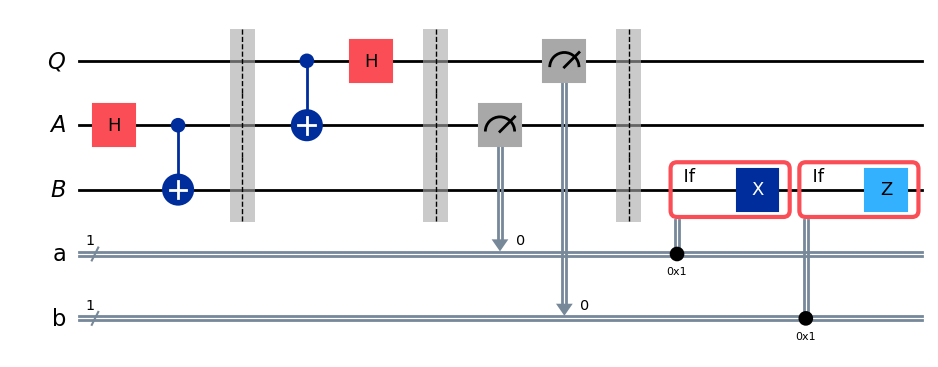

In [6]:
qubit = QuantumRegister(1, "Q")
ebit0 = QuantumRegister(1, "A")
ebit1 = QuantumRegister(1, "B")
a = ClassicalRegister(1, "a")
b = ClassicalRegister(1, "b")

protocol = QuantumCircuit(qubit, ebit0, ebit1, a, b)

# Prepare ebit used for teleportation
protocol.h(ebit0)
protocol.cx(ebit0, ebit1)
protocol.barrier()

# Alice's operations
protocol.cx(qubit, ebit0)
protocol.h(qubit)
protocol.barrier()

# Alice measures and sends classical bits to Bob
protocol.measure(ebit0, a)
protocol.measure(qubit, b)
protocol.barrier()

# Bob uses the classical bits to conditionally apply gates
with protocol.if_test((a, 1)):
    protocol.x(ebit1)
with protocol.if_test((b, 1)):
    protocol.z(ebit1)

display(protocol.draw(output="mpl"))

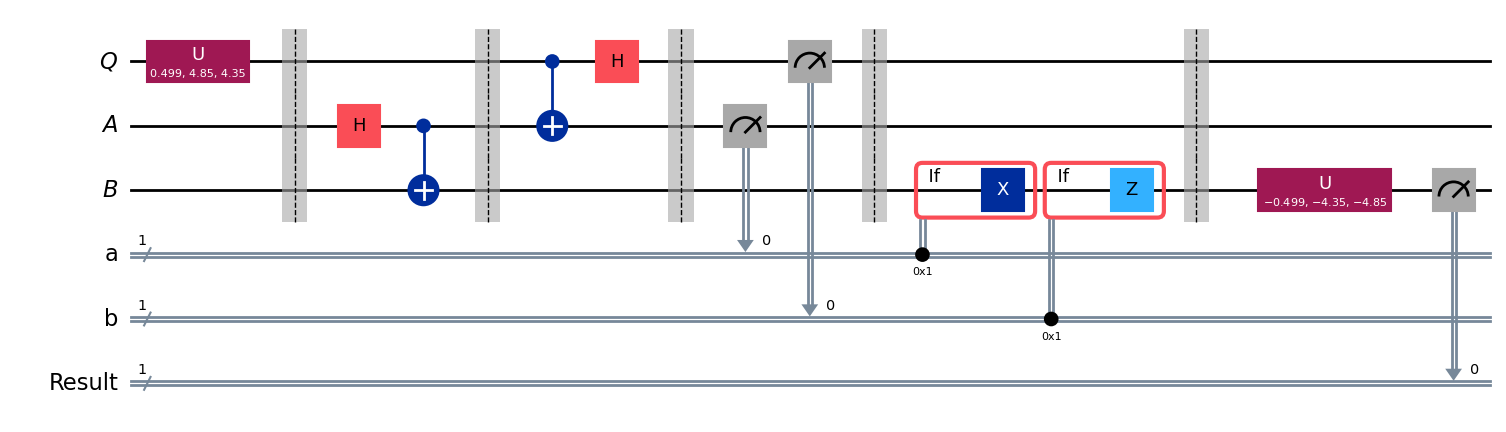

In [7]:
random_gate = UGate(
    theta=random.random() * 2 * pi,
    phi=random.random() * 2 * pi,
    lam=random.random() * 2 * pi
)

# Create a new circuit including the same bits and qubits used in the
# teleportation protocol.

test = QuantumCircuit(qubit, ebit0, ebit1, a, b)

# Start with the randomly selected gate on Q

test.append(random_gate, qubit)
test.barrier()

# Append the entire teleportation protocol from above.

test = test.compose(protocol)
test.barrier()

# Finally, apply the inverse of the random unitary to B and measure.

test.append(random_gate.inverse(), ebit1)
result = ClassicalRegister(1, "Result")
test.add_register(result)
test.measure(ebit1, result)

display(test.draw(output="mpl"))

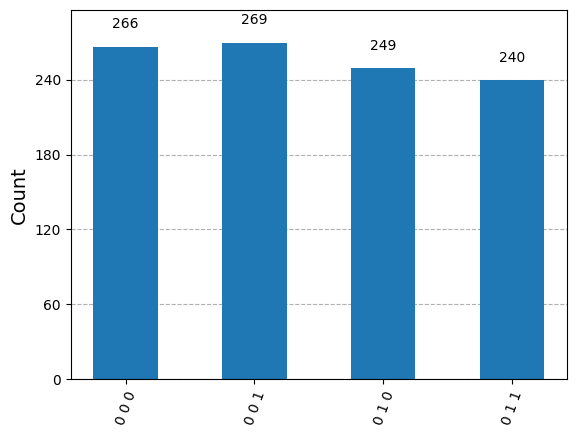

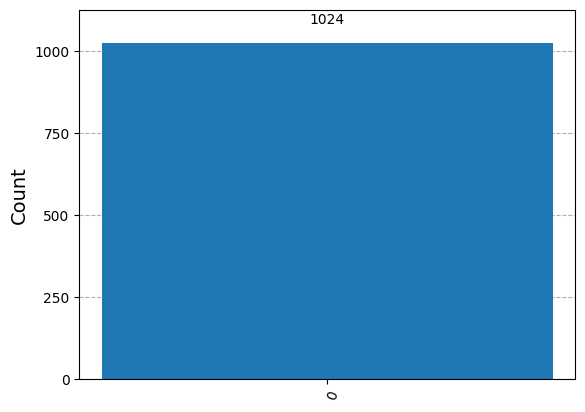

In [8]:
result = AerSimulator().run(test).result()
statistics = result.get_counts()
display(plot_histogram(statistics))
filtered_statistics = marginal_distribution(statistics, [2])
display(plot_histogram(filtered_statistics))

# メモ

量子状態が転送できてることを直接確認する方法がないため、Uの逆で戻ること確認

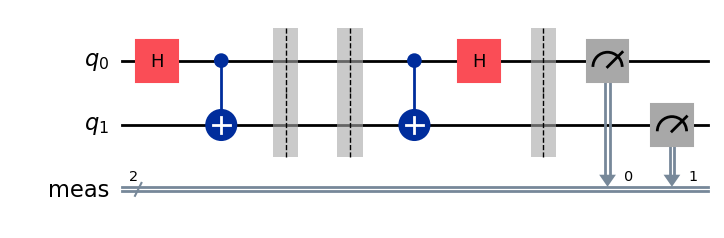

Measured 00 with frequency 1024


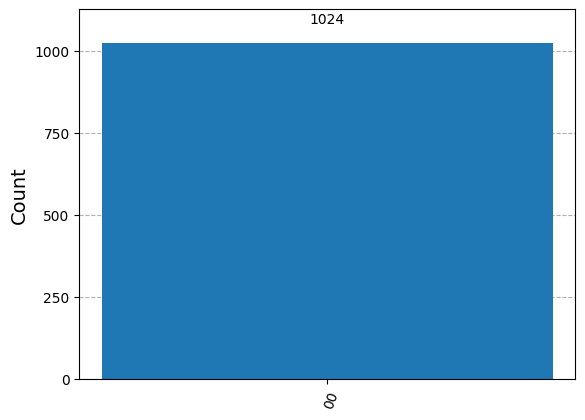

In [13]:
c = "0"
d = "0"

protocol = QuantumCircuit(2)

# Prepare ebit used for superdense coding
protocol.h(0)
protocol.cx(0, 1)
protocol.barrier()

# Alice's operations
if d == "1":
    protocol.z(0)
if c == "1":
    protocol.x(0)
protocol.barrier()

# Bob's actions
protocol.cx(0, 1)
protocol.h(0)
protocol.measure_all()

display(protocol.draw(output="mpl"))

result = AerSimulator().run(protocol).result()
statistics = result.get_counts()

for outcome, frequency in statistics.items():
    print(f"Measured {outcome} with frequency {frequency}")

display(plot_histogram(statistics))

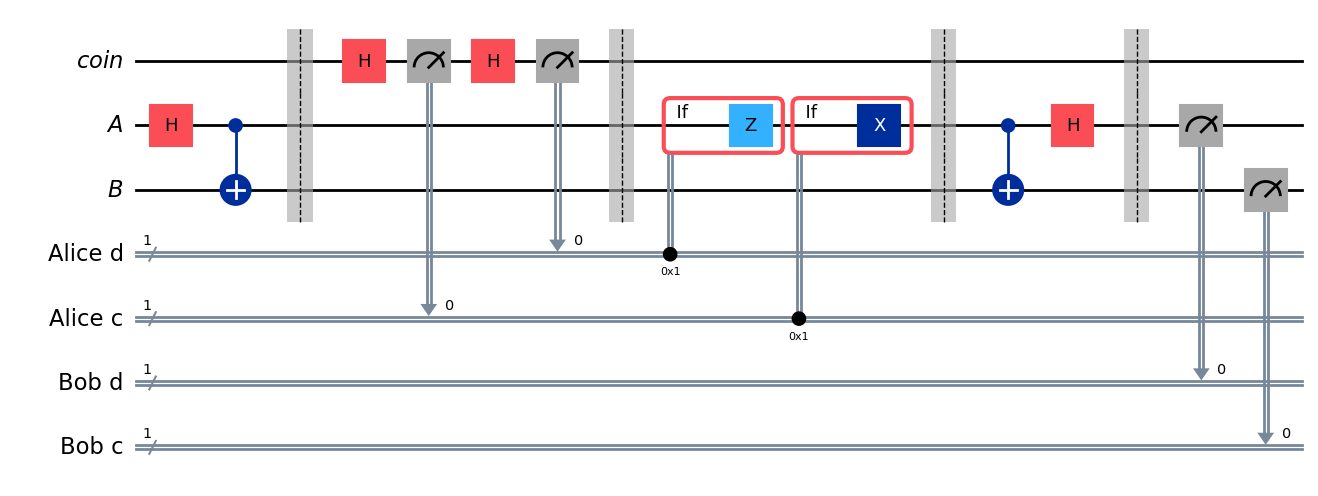

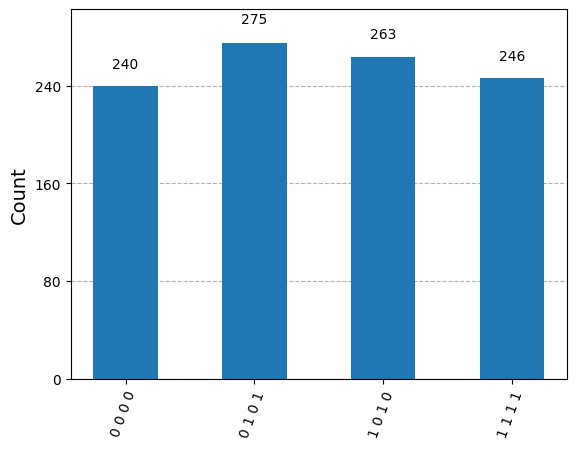

In [14]:
rbg = QuantumRegister(1, "coin")
ebit0 = QuantumRegister(1, "A")
ebit1 = QuantumRegister(1, "B")

Alice_c = ClassicalRegister(1, "Alice c")
Alice_d = ClassicalRegister(1, "Alice d")

test = QuantumCircuit(rbg, ebit0, ebit1, Alice_d, Alice_c)

# Initialize the ebit
test.h(ebit0)
test.cx(ebit0, ebit1)
test.barrier()

# Use the 'coin' qubit twice to generate Alice's bits c and d.
test.h(rbg)
test.measure(rbg, Alice_c)
test.h(rbg)
test.measure(rbg, Alice_d)
test.barrier()

# Now the protocol runs, starting with Alice's actions, which depend
# on her bits.
with test.if_test((Alice_d, 1), label="Z"):
    test.z(ebit0)
with test.if_test((Alice_c, 1), label="X"):
    test.x(ebit0)
test.barrier()

# Bob's actions
test.cx(ebit0, ebit1)
test.h(ebit0)
test.barrier()

Bob_c = ClassicalRegister(1, "Bob c")
Bob_d = ClassicalRegister(1, "Bob d")
test.add_register(Bob_d)
test.add_register(Bob_c)
test.measure(ebit0, Bob_d)
test.measure(ebit1, Bob_c)

display(test.draw(output="mpl"))

result = AerSimulator().run(test).result()
statistics = result.get_counts()
display(plot_histogram(statistics))

# メモ
0100や1000等が存在せず0101や1111など、dc(A)dc(B)が等しいことがわかる